In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
RNA_seq = pd.read_csv("../datasets/Finalsets/dataset.csv")
RNA_seq

,Label,Sequence,Length
0,IRES,GCAGAAAGCGTCTAGCCATGGCGTTAGTATGAGTGTCGTGCAGCCT...,256
1,IRES,GCAGAAAGCGTCTAGCCATGGCGTTAGTATGAGTGTCGTGCAGCCT...,256
2,IRES,GCAGAAAGCGTCTAGCCATGGCGTTAGTATGAGTGTCGTGCAGCCT...,256
3,IRES,GCAGAAAGCGTCTAGCCATGGCGTTAGTATGAGTGTCGTGCAGCCT...,212
4,IRES,GAGGAACUACUGUCUUCACGCAGAAAGCGUCUAGCCAUGGCGUUAG...,279
...,...,...,...
52872,Intron_gpII,ATGAGCCGTATGAGGTAGGAAACTCTCAAGTACGGTTCTAAGGGAA...,64
52873,Intron_gpII,GAGAGCACAGTACGATGAAAGTTGTAAGCTGTGTTCGGGGGGGAGT...,112
52874,Intron_gpII,GGGAGCCGGGTGAGGCGAGAGTCTCACGCCCGGTTCTGCGAGAGGC...,76
52875,Intron_gpII,GAGAGCACAGTACGATGAAAGTTGTAAGCTGTGTTCGGGGGGGAGT...,114


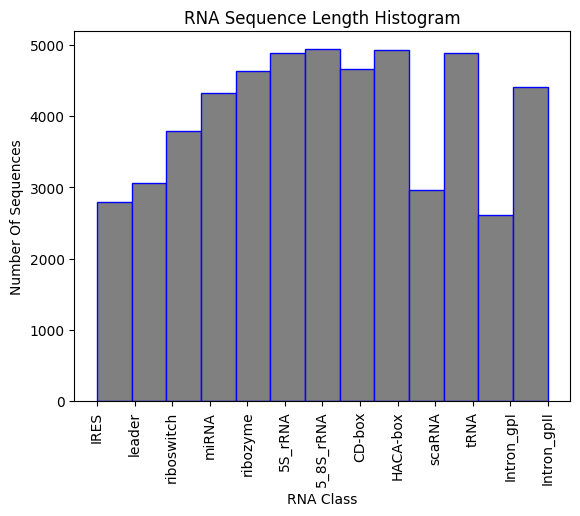

In [6]:
plt.hist(RNA_seq['Label'], bins=13, color="grey", ec="blue")
plt.xticks(rotation=90)
plt.gca().set(
    title='RNA Sequence Length Histogram', 
    xlabel='RNA Class',
    ylabel = 'Number Of Sequences');


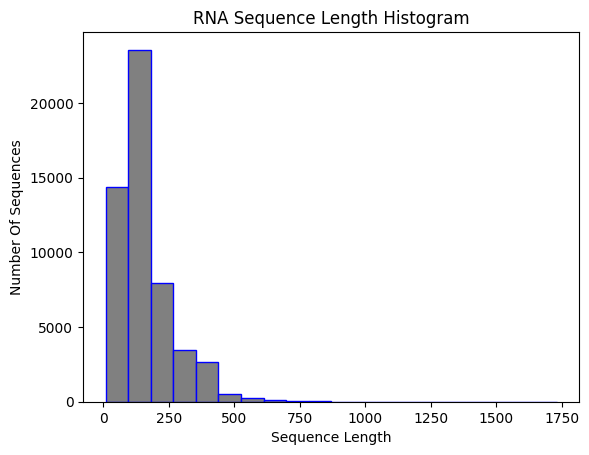

In [7]:
plt.hist(RNA_seq['Length'], bins=20, color="grey", ec="blue")
plt.gca().set(
    title='RNA Sequence Length Histogram', 
    xlabel='Sequence Length',
    ylabel = 'Number Of Sequences');

In [8]:
RNA_seq['Label'].value_counts()

5_8S_rRNA      4940
HACA-box       4931
5S_rRNA        4882
tRNA           4882
CD-box         4661
ribozyme       4630
Intron_gpII    4409
miRNA          4317
riboswitch     3791
leader         3061
scaRNA         2962
IRES           2800
Intron_gpI     2611
Name: Label, dtype: int64

In [9]:
RNA_Classes = RNA_seq['Label'].unique()
print(RNA_Classes)


['IRES' 'leader' 'riboswitch' 'miRNA' 'ribozyme' '5S_rRNA' '5_8S_rRNA'
 'CD-box' 'HACA-box' 'scaRNA' 'tRNA' 'Intron_gpI' 'Intron_gpII']


# RNA Number of Sequences per length per class

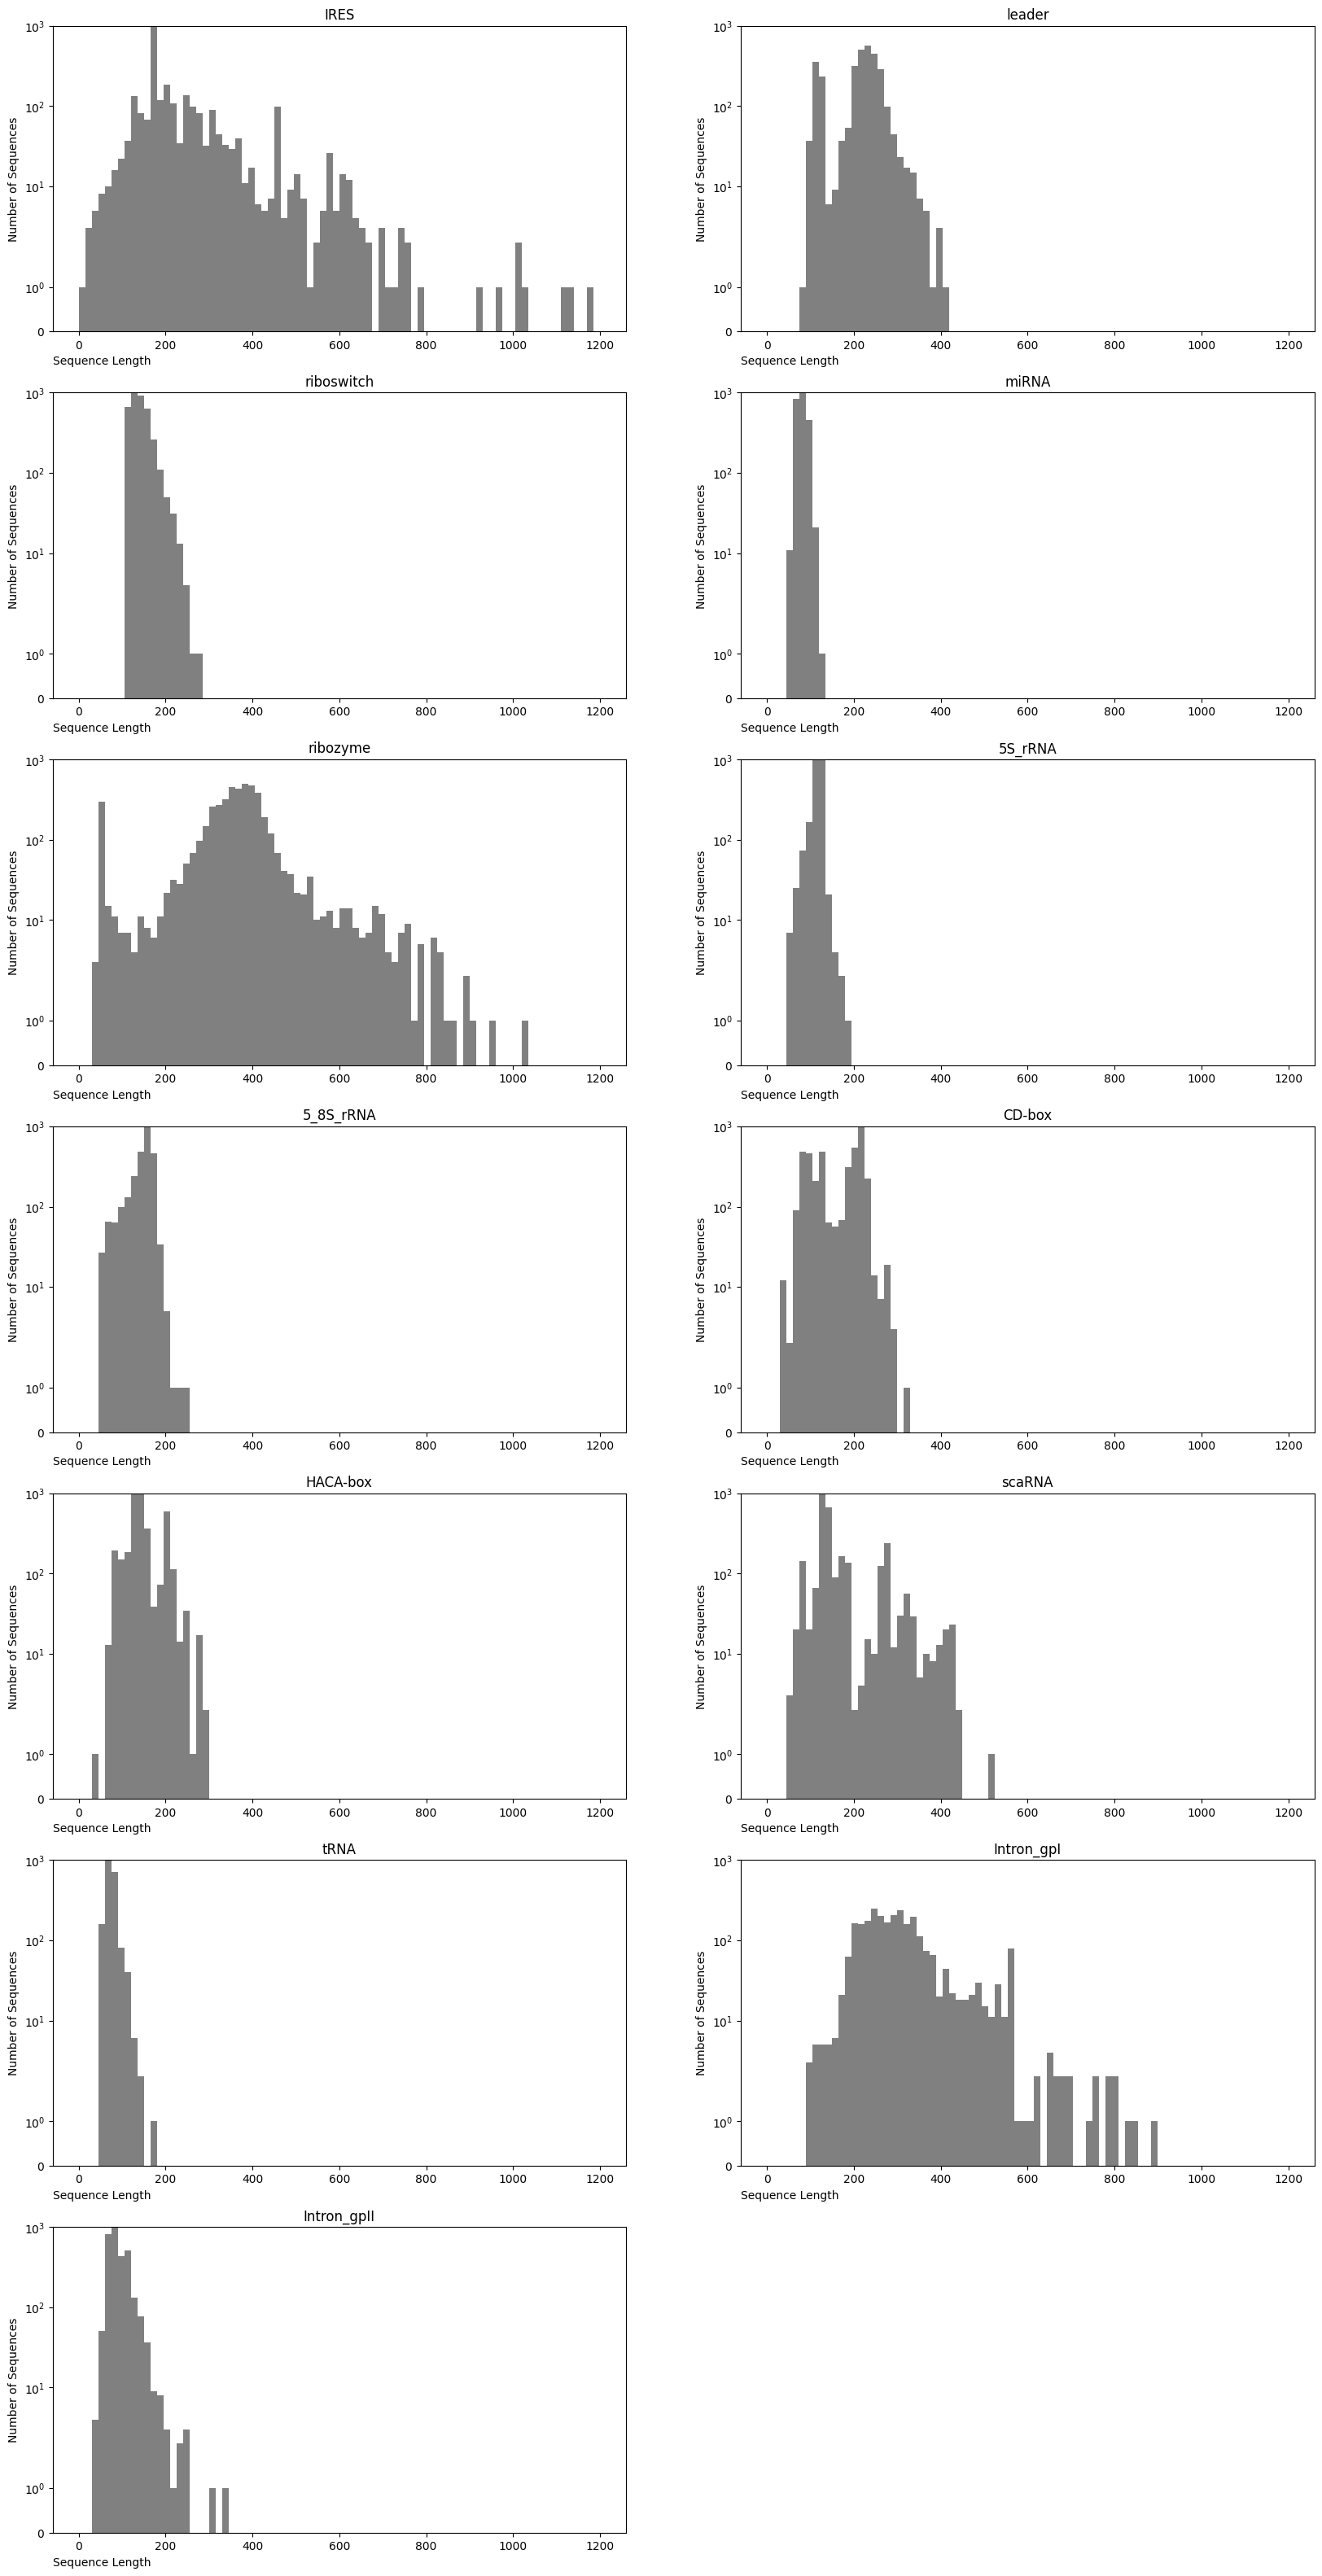

In [16]:
count = 0
fig, axs = plt.subplots(7,2,figsize=(20, 40))

for RNA_class in RNA_Classes:
    axs[int(count/2)][count%2].hist(RNA_seq.query('Label == @RNA_class')['Length'], bins=80, range=[0,1200], color="grey")
    axs[int(count/2)][count%2].set_title(RNA_class)
    count += 1

for ax in axs.flat:
    ax.set_ylabel('Number of Sequences')
    ax.set_xlabel('Sequence Length', loc='left')
    ax.set_ylim([0,1000])
    ax.set_yscale("symlog") # symmetric logarithmic scale
    


# Remove last plot
fig.delaxes(axs[6][1])


In [11]:
means = []
stds = []
for RNA_class in RNA_Classes:
    res = RNA_seq.query('Label == @RNA_class')['Length']
    means.append(int(res.mean().round(0)))
    stds.append(int(res.std().round(0)))

df_stats = pd.DataFrame(data={'RNA_Class':RNA_Classes,'Mean':means,'STD':stds})
df_stats



    

,RNA_Class,Mean,STD
0,IRES,231,123
1,leader,211,54
2,riboswitch,141,22
3,miRNA,81,8
4,ribozyme,352,116
5,5S_rRNA,117,8
6,5_8S_rRNA,150,21
7,CD-box,168,56
8,HACA-box,144,33
9,scaRNA,168,72


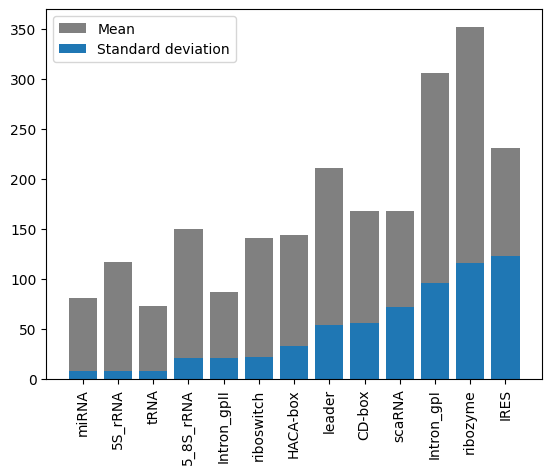

In [12]:

plt.xticks(rotation=90)
df_stats = df_stats.sort_values(by='STD')
plt.bar(df_stats['RNA_Class'],df_stats['Mean'],label = 'Mean',color = "grey")
plt.bar(df_stats['RNA_Class'],df_stats['STD'],label = 'Standard deviation')
plt.legend()
plt.show()
